In [1]:
import pandas as pd
import seaborn as sns
import requests
import urllib
import urllib3
import pandas as pd

df = pd.read_csv('../../../data/kc_house_data_update1.csv')

In [2]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,datefloat,renovated,bath_per_bed,skinniness,dist
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0.0,...,98178,47.5112,-122.257,1340,5650,16356.0,0,0.333333,1180.0,0.154164
1,6414100192,12/09/2014,538000.0,3,2.25,2570,7242,2.0,0,0.0,...,98125,47.7210,-122.319,1690,7639,16413.0,1,0.750000,1285.0,0.161642
2,5631500400,02/25/2015,180000.0,2,1.00,770,10000,1.0,0,0.0,...,98028,47.7379,-122.233,2720,8062,16491.0,0,0.500000,770.0,0.109873
3,2487200875,12/09/2014,604000.0,4,3.00,1960,5000,1.0,0,0.0,...,98136,47.5208,-122.393,1360,5000,16413.0,0,0.750000,1960.0,0.247977
4,1954400510,02/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0.0,...,98074,47.6168,-122.045,1800,7503,16484.0,0,0.666667,1680.0,0.134928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,05/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0.0,...,98103,47.6993,-122.346,1530,1509,16211.0,0,0.833333,510.0,0.177767
21593,6600060120,02/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0.0,...,98146,47.5107,-122.362,1830,7200,16489.0,0,0.625000,1155.0,0.227279
21594,1523300141,06/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0.0,...,98144,47.5944,-122.299,1020,2007,16244.0,0,0.375000,510.0,0.131089
21595,291310100,01/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0.0,...,98027,47.5345,-122.069,1410,1287,16451.0,0,0.833333,800.0,0.153444


<AxesSubplot:xlabel='price', ylabel='sqft_living'>

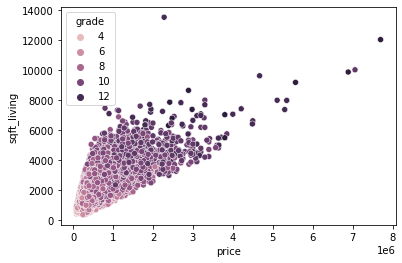

In [3]:
sns.scatterplot(data=df, x="price", y="sqft_living", hue= 'grade')

In [4]:
df = df.loc[df['bedrooms'] < 30]

In [5]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,datefloat,renovated,bath_per_bed,skinniness,dist
id,1.000000,-0.016763,0.002328,0.005145,-0.012258,-0.131920,0.018576,-0.003602,0.011564,-0.023721,...,-0.008195,-0.001766,0.020643,-0.002734,-0.138570,0.005346,-0.010628,0.010591,-0.020584,0.006240
price,-0.016763,1.000000,0.315961,0.525915,0.701929,0.089879,0.256820,0.264308,0.393754,0.036031,...,-0.053409,0.306687,0.022047,0.585267,0.082849,-0.003984,0.117546,0.281312,0.432428,-0.378911
bedrooms,0.002328,0.315961,1.000000,0.527870,0.593178,0.033602,0.183707,-0.002054,0.080808,0.023440,...,-0.158588,-0.011595,0.136561,0.404532,0.031892,-0.015236,0.018354,-0.237756,0.431757,-0.101420
bathrooms,0.005145,0.525915,0.527870,1.000000,0.755755,0.088368,0.502574,0.063628,0.186081,-0.126443,...,-0.204778,0.024301,0.224889,0.569878,0.088297,-0.034262,0.046738,0.652727,0.361873,-0.093273
sqft_living,-0.012258,0.701929,0.593178,0.755755,1.000000,0.173449,0.353941,0.104635,0.281912,-0.059397,...,-0.199793,0.052178,0.241200,0.756400,0.184337,-0.034303,0.050825,0.310683,0.650501,-0.139961
sqft_lot,-0.131920,0.089879,0.033602,0.088368,0.173449,1.000000,-0.004824,0.021458,0.075127,-0.008806,...,-0.129582,-0.085507,0.230222,0.144756,0.718203,0.006326,0.005089,0.063289,0.148770,0.157724
floors,0.018576,0.256820,0.183707,0.502574,0.353941,-0.004824,1.000000,0.020794,0.028389,-0.264013,...,-0.059522,0.049280,0.125912,0.280072,-0.010734,-0.022381,0.003705,0.421135,-0.393866,-0.017980
waterfront,-0.003602,0.264308,-0.002054,0.063628,0.104635,0.021458,0.020794,1.000000,0.380694,0.016659,...,0.028925,-0.012154,-0.037632,0.083822,0.030657,0.000358,0.074267,0.073762,0.080085,-0.001988
view,0.011564,0.393754,0.080808,0.186081,0.281912,0.075127,0.028389,0.380694,1.000000,0.045717,...,0.085149,0.006144,-0.077800,0.279102,0.073170,-0.001370,0.090399,0.131204,0.257007,-0.006722
condition,-0.023721,0.036031,0.023440,-0.126443,-0.059397,-0.008806,-0.264013,0.016659,0.045717,1.000000,...,0.002835,-0.015209,-0.105800,-0.092979,-0.003093,-0.050765,-0.055369,-0.158398,0.149594,-0.039655


<AxesSubplot:xlabel='price', ylabel='bedrooms'>

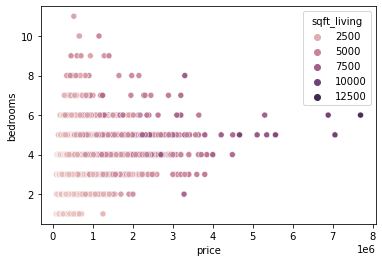

In [10]:
sns.scatterplot(data=df, x="price", y="bedrooms",hue = "sqft_living" )